In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import cv2
from os import listdir
from os.path import isfile,join

 ### 1.Python method listdir() 
 #### returns a list containing the names of the entries in the directory given by path.

### 2.cv2.imread(path, flag)  - 
#### cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
### 3.Simple Thresholding - 
#### For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value.  The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold.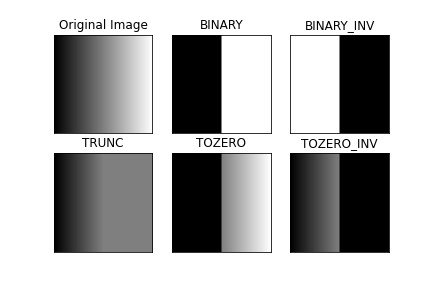


#### RETR_EXTERNAL -in some cases, some shapes are inside other shapes. Just like nested figures.we call outer one as parent and inner one as child. This way, contours in an image has some relationship to each other. And we can specify how one contour is connected to each other, like, is it child of some other contour, or is it a parent etc. Representation of this relationship is called the Hierarchy.If you use this flag, it returns only extreme outer flags. All child contours are left behind. 

####  If you pass cv.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what cv.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory. 

#### sorted(iterable, key=key, reverse=reverse) - key -  A Function to execute to decide the order. Default is None

In [2]:
def load_images(folder):
    train_data = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder , filename), cv2.IMREAD_GRAYSCALE)
        img = ~ img
        if img is not None:
            _,thresh = cv2.threshold(img , 127 , 255 , cv2.THRESH_BINARY)
            ctrs,hierachy = cv2.findContours(thresh , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
            cnt = sorted(ctrs , key = lambda ctr:cv2.boundingRect(ctr)[0])
            w = int(28)
            h = int(28)
            maxi = 0
            for c in cnt:
                x , y , w, h = cv2.boundingRect(c)
                maxi = max(w*h , maxi)
                if maxi==w*h:
                    x_max = x
                    y_max = y
                    h_max = h
                    w_max = w
            im_crop = thresh[y_max:y_max+h_max+10 , x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop , (28, 28))
            im_resize = np.reshape(im_resize,(784 ,1))
            
            train_data.append(im_resize)
     
    return(train_data)

In [3]:
data = []

In [5]:
#assign '-'=10
data = load_images('C:/Users/win10/Desktop/extracted_images/-')
for i in range(0,len(data)):
    data[i] = np.append(data[i] , ["10"])
print(len(data))

2649


In [11]:
data0 = load_images('C:/Users/win10/Desktop/extracted_images/0')
for i in range(0,len(data0)):
    data0[i] = np.append(data0[i] , ["0"])
data = np.concatenate((data , data0))
print(len(data))

9563


In [12]:
data1 = load_images('C:/Users/win10/Desktop/extracted_images/1')
for i in range(0,len(data1)):
    data1[i] = np.append(data1[i] , ["1"])
data = np.concatenate((data , data1))
print(len(data))

36083


In [13]:
data2 = load_images('C:/Users/win10/Desktop/extracted_images/2')
for i in range(0,len(data2)):
    data2[i] = np.append(data2[i] , ["2"])
data = np.concatenate((data , data2))
print(len(data))

62224


In [14]:
data3 = load_images('C:/Users/win10/Desktop/extracted_images/3')
for i in range(0,len(data3)):
    data3[i] = np.append(data3[i] , ["3"])
data = np.concatenate((data , data3))
print(len(data))

73133


In [15]:
data4 = load_images('C:/Users/win10/Desktop/extracted_images/4')
for i in range(0,len(data4)):
    data4[i] = np.append(data4[i] , ["4"])
data = np.concatenate((data , data4))
print(len(data))

80529


In [16]:
data5 = load_images('C:/Users/win10/Desktop/extracted_images/5')
for i in range(0,len(data5)):
    data5[i] = np.append(data5[i] , ["5"])
data = np.concatenate((data , data5))
print(len(data))

84074


In [17]:
data6 = load_images('C:/Users/win10/Desktop/extracted_images/6')
for i in range(0,len(data6)):
    data6[i] = np.append(data6[i] , ["6"])
data = np.concatenate((data , data6))
print(len(data))

87192


In [18]:
data7 = load_images('C:/Users/win10/Desktop/extracted_images/7')
for i in range(0,len(data7)):
    data7[i] = np.append(data7[i] , ["7"])
data = np.concatenate((data , data7))
print(len(data))

90101


In [19]:
data8 = load_images('C:/Users/win10/Desktop/extracted_images/8')
for i in range(0,len(data8)):
    data8[i] = np.append(data8[i] , ["8"])
data = np.concatenate((data , data8))
print(len(data))

93169


In [20]:
data9 = load_images('C:/Users/win10/Desktop/extracted_images/9')
for i in range(0,len(data9)):
    data9[i] = np.append(data9[i] , ["9"])
data = np.concatenate((data , data9))
print(len(data))

96906


In [21]:
#assign + = 11
data11=load_images('C:/Users/win10/Desktop/extracted_images/+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

122018


In [22]:
#assign * = 12
data12=load_images('C:/Users/win10/Desktop/extracted_images/times')

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

125269


In [23]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

In [24]:
len(data)

125269